[texte du lien](https://)
# Store Sales Predection :
bigstore is a renowned retail corporation that operates a chain of hypermarkets. Here, bigstore has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. bigstore tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

#  Objectives

Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?



Dataset Info:\
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Store_sales. Within this file you will find the following fields:\
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales  a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.


# <center> Stractegic Plan of Action:
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion




# <center>1. Data Exploration

Importing the necessary libraries, like pandas, numpy and some plotting libraries such as matplotlib and seaborn......

In [79]:

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

default size :

In [80]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Reading of data as a pandas dataframe and named as **DATA**

In [81]:
data = pd.read_csv('store.csv')

In [82]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [83]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


Using the date column i create three seperate columns of weekday, month and year and added to the existing dataset.

In [84]:
data['weekday'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

Now I drop the date columns because of no use of it.

In [85]:
data.drop(['Date'], axis=1, inplace=True)

In [86]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)


 the modified dataset is look like:

In [87]:
data.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.4 KB


Explored the unique values of the weekday, month and year columns as follows:

In [89]:
print('years unique value', data.year.unique())
print('months unique value', data.month.unique())
print('weekday unique value', data.weekday.unique())

years unique value [2010 2011 2012]
months unique value [ 2  3  4  5  6  7  8  9 10 11 12  1]
weekday unique value [4]


Months and weekday are as usual, but the data is taken from year 2010, 2011, 2012 only.

In [90]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [91]:
data.nunique().sort_values()

weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [92]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

[texte du lien](https://)Dataset doesn't have null values

In [93]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


## Data Visualization

In [94]:
data.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


we have:

**Numerical columns:** Weekly_sales, temperature, fuel_price, cpi, unemployment

**Categorical columns:** Holiday_flag, Weekday, month, year

Now plotted the count plot to get the distribution or frequency of the columns

# <center> 2. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Year Count plot')

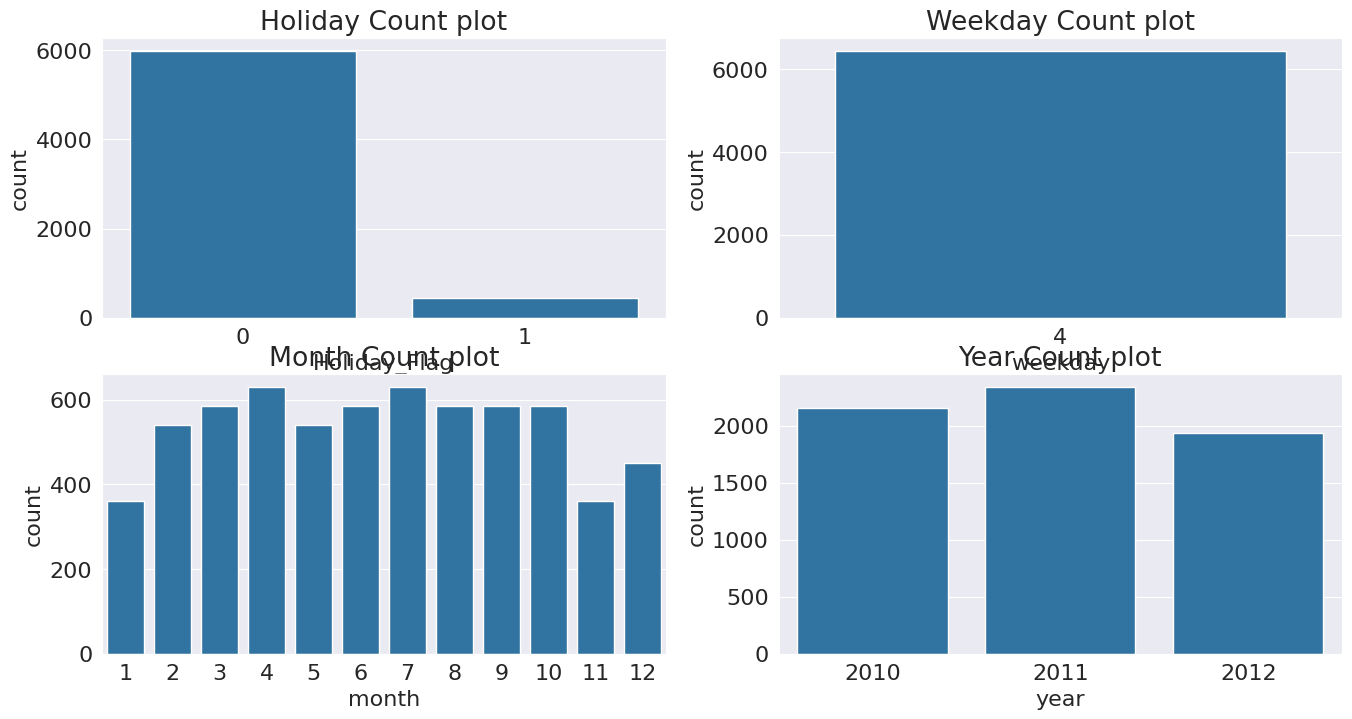

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#axes[0,0].set_title('Holiday Count plot')
sns.countplot(x='Holiday_Flag', data=data, ax= axes[0,0])
axes[0, 0].set_title('Holiday Count plot')

#axes[0,1].set_title('Weekday Count plot')
sns.countplot(x='weekday', data=data, ax= axes[0,1]);
axes[0, 1].set_title('Weekday Count plot')

#axes[1,0].set_title('month Count plot')
sns.countplot(x='month', data=data, ax= axes[1,0]);
axes[1, 0].set_title('Month Count plot')

#axes[1,1].set_title('year Count plot')
sns.countplot(x='year', data=data, ax= axes[1,1]);
axes[1, 1].set_title('Year Count plot')


myyyyyy remarque :    
*   Dans holiday flag, la plupart du temps, il n’y a pas de congé dans cette semaine.
*   Dans les colonnes de la wekly, les observations sont principalement liées au jour 4
*   La plupart des observations dans les données datent du mois d’avril.
*   La majeure partie de l’observation dans les données est de l’année 2011

To get the idea of how many observations are there in dataset crossponding to each store, I again plot a count plot.







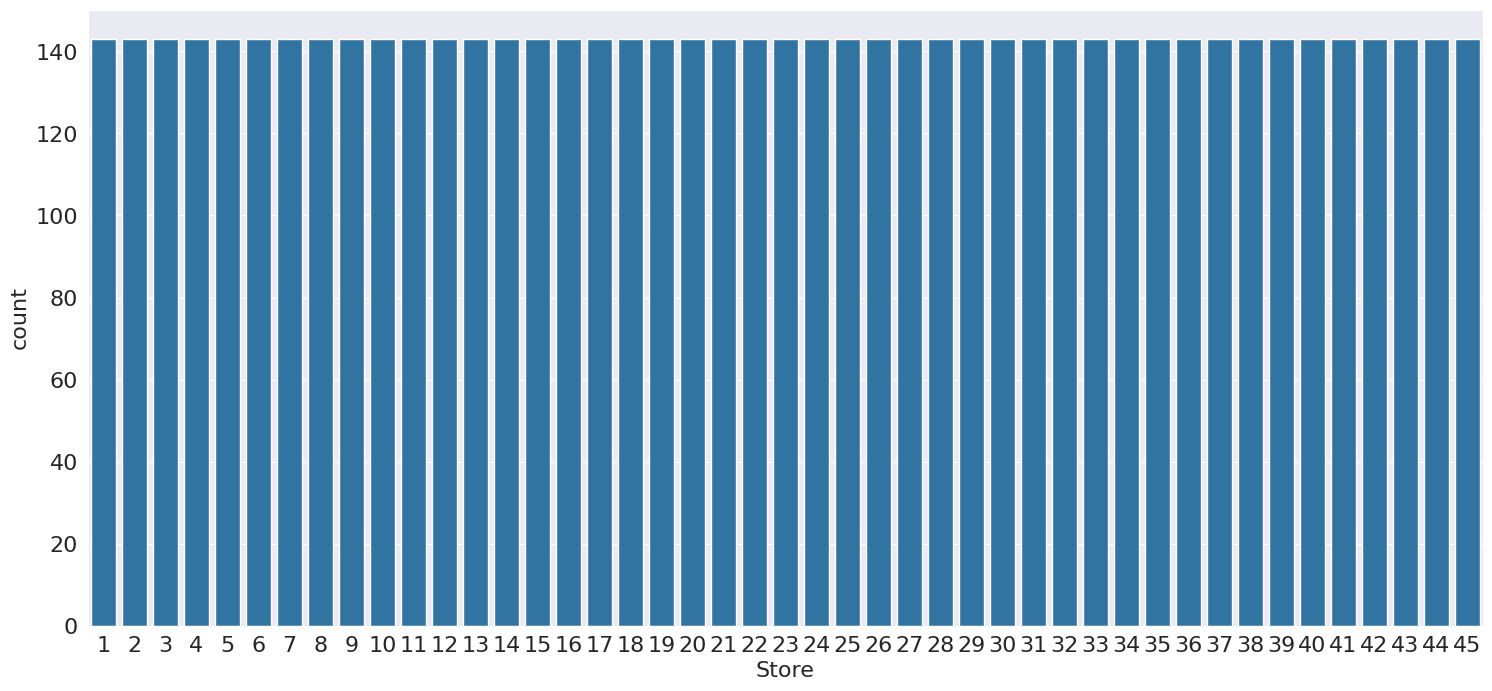

In [96]:
plt.figure(figsize= (18,8))
sns.countplot(x= 'Store', data= data);
plt.show()

Pour analyser la distribution des données, j’ai tracé l’histogramme et le diagramme en boîtes pour Température, Chômage, Fuel_Price, CPI.

> Ajouter une citation

> Ajouter une citation





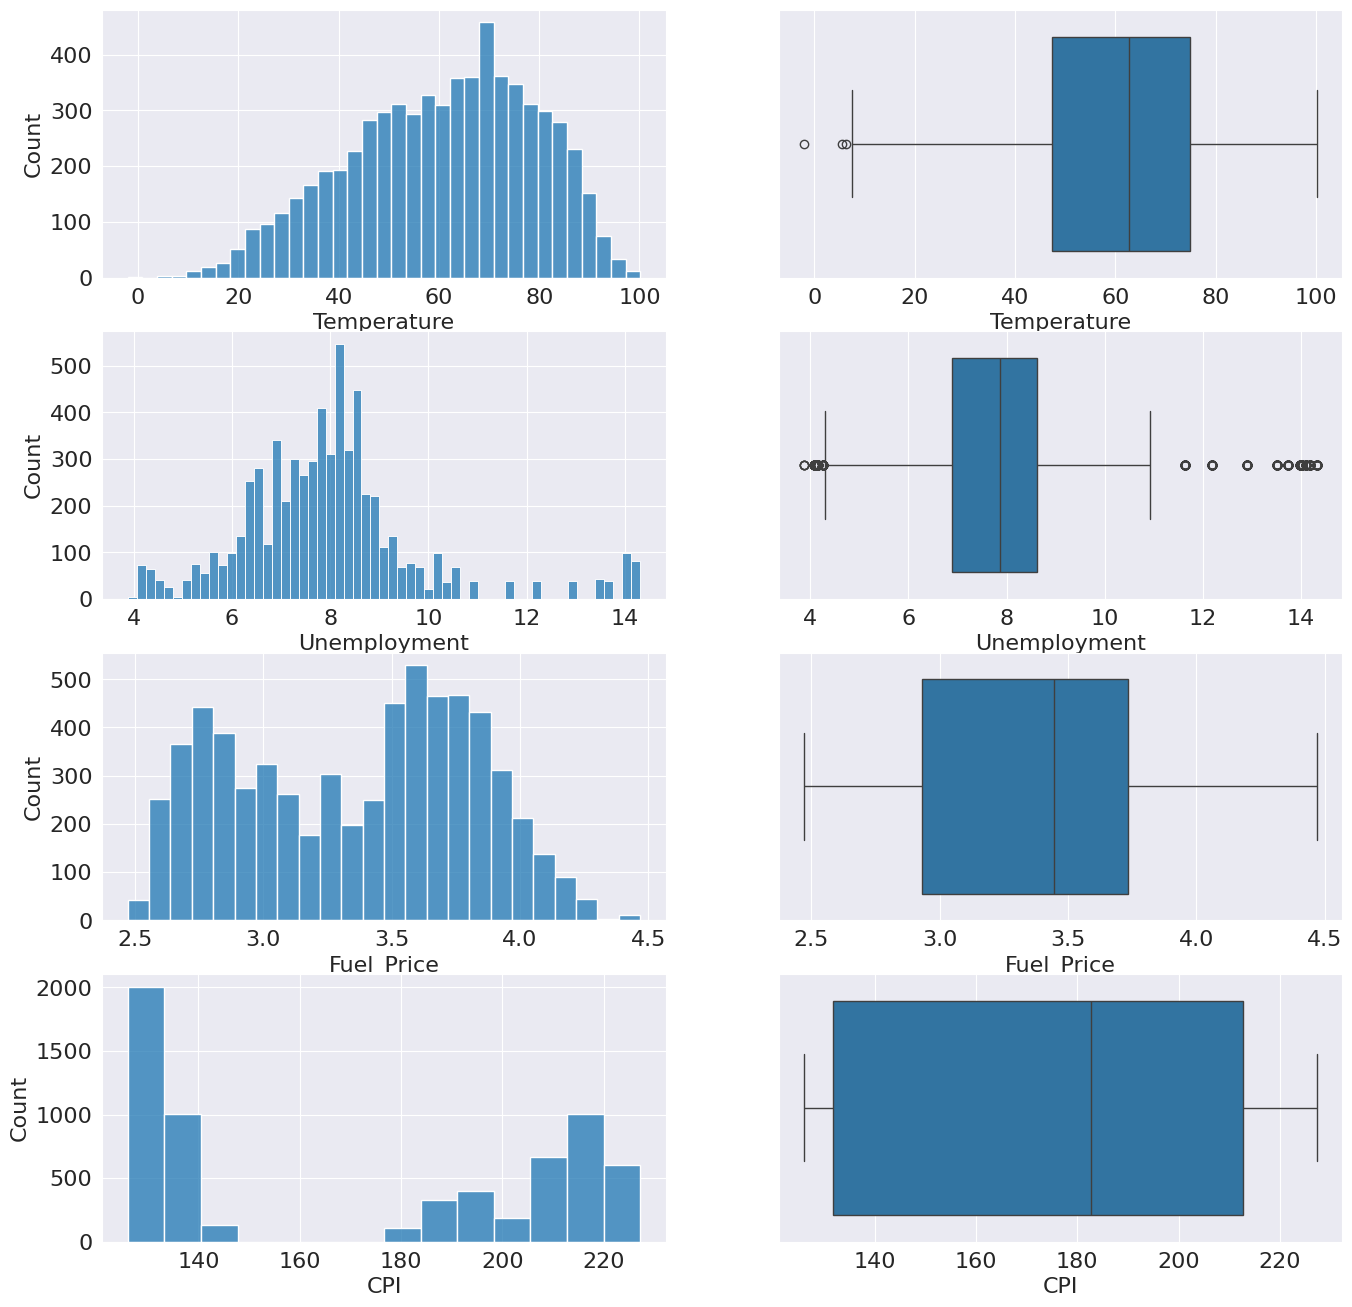

In [97]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
# axes[0,0].set_title('Temperature')
sns.histplot(x= 'Temperature', data= data, ax= axes[0,0])

sns.boxplot(x= 'Temperature', data= data, ax= axes[0,1])

# axes[1,0].set_title('Unemployment')
sns.histplot(x= 'Unemployment', data= data, ax= axes[1,0])

sns.boxplot(x= 'Unemployment', data= data, ax= axes[1,1])

# axes[2,0].set_title('Fuel_Price')
sns.histplot(x= 'Fuel_Price', data= data, ax= axes[2,0])

sns.boxplot(x = 'Fuel_Price', data= data, ax= axes[2,1])

# axes[3,0].set_title('CPI')
sns.histplot(x= 'CPI', data= data, ax= axes[3,0])

sns.boxplot(x= 'CPI', data= data, ax= axes[3,1]);

# <center> 3. Data Preprocessing

**remove** duplicate

In [100]:
data.drop_duplicates(inplace=True)


Check for empty elements





In [101]:

nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


Encoding

In [102]:
#Converting categorical Columns to Numeric

df3 = data.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
month
Store


(6435, 64)

One-Hot Encoding : Utilisé pour les colonnes avec exactement 2 valeurs uniques. Il crée une nouvelle colonne binaire.
Dummy Encoding : Utilisé pour les colonnes avec plus de 2 valeurs uniques. Il crée plusieurs colonnes binaires, une pour chaque catégorie, sauf une pour éviter la multi-colinéarité.
Avantages : Ces techniques permettent d'intégrer des variables catégorielles dans des modèles de machine learning qui ne peuvent travailler qu'avec des données numériques.

In [103]:
df3.shape

(6435, 64)

In [104]:
df3.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,False,42.31,2.572,211.096358,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,True,38.51,2.548,211.242170,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,False,39.93,2.514,211.289143,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,False,46.63,2.561,211.319643,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,False,46.50,2.625,211.350143,8.106,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3lach 7ayadna les valeur abberrantes 🇰


*   Les valeurs aberrantes peuvent fausser les résultats des analyses statistiques,
*   es valeurs aberrantes peuvent perturber les algorithmes et conduire à des modèles moins précis.



In [105]:
#Removal of outlier:

data1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    data1 = data1[data1[i] <= (Q3+(1.5*IQR))]
    data1 = data1[data1[i] >= (Q1-(1.5*IQR))]
    data1 = data1.reset_index(drop=True)
display(data1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(data1.shape[0]))

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,False,42.31,2.572,211.096358,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,True,38.51,2.548,211.242170,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,False,39.93,2.514,211.289143,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,False,46.63,2.561,211.319643,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,False,46.50,2.625,211.350143,8.106,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


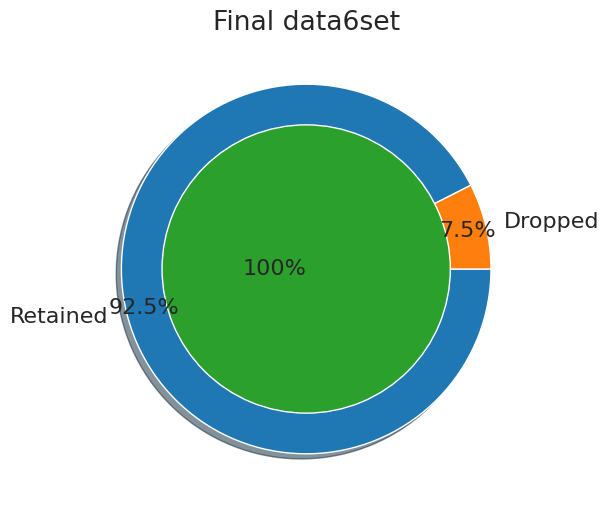


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data6.


In [106]:
#Final data6set size after performing Preprocessing

data6 = data1.copy()
data6.columns=[i.replace('-','_') for i in data6.columns]

plt.title('Final data6set')
plt.pie([data6.shape[0], original_df.shape[0]-data6.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([data6.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-data6.shape[0]} samples were dropped, \
while retaining {round(100 - (data6.shape[0]*100/(original_df.shape[0])),2)}% of the data6.')

# <center> 4. Data Manipulation

**Standardization**

In [107]:
scaler = MinMaxScaler()
scaler.fit(data6)
scaled_df = scaler.transform(data6)

In [109]:
scaled_df = pd.DataFrame(data = scaled_df, columns = data6.columns)

In [110]:
scaled_df.head(3)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0.397291,0.0,0.388689,0.050100,0.840500,0.573889,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.396811,1.0,0.348520,0.038076,0.841941,0.573889,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.388501,0.0,0.363531,0.021042,0.842405,0.573889,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
scaled_df.to_csv('scaled_df.csv', index=False)

**Train-Test-Split**

Split the dataset into the two part:
1. Training dataset
2. Testing dataset

mhm hnaya m7inah flawal bach nkhdmoh ka target

In [112]:
X = scaled_df.drop(target, axis=1)
y = scaled_df[target]

 divising the dataset into the train and the test parts and each part has input feature and target features



In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(drop=True,inplace=True)


In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 63), (1191, 63), (4762,), (1191,))

# <center> 5. Feature Selection

checking the correlation
**[texte en gras](https://)**

                                       Correlation Matrix                                       


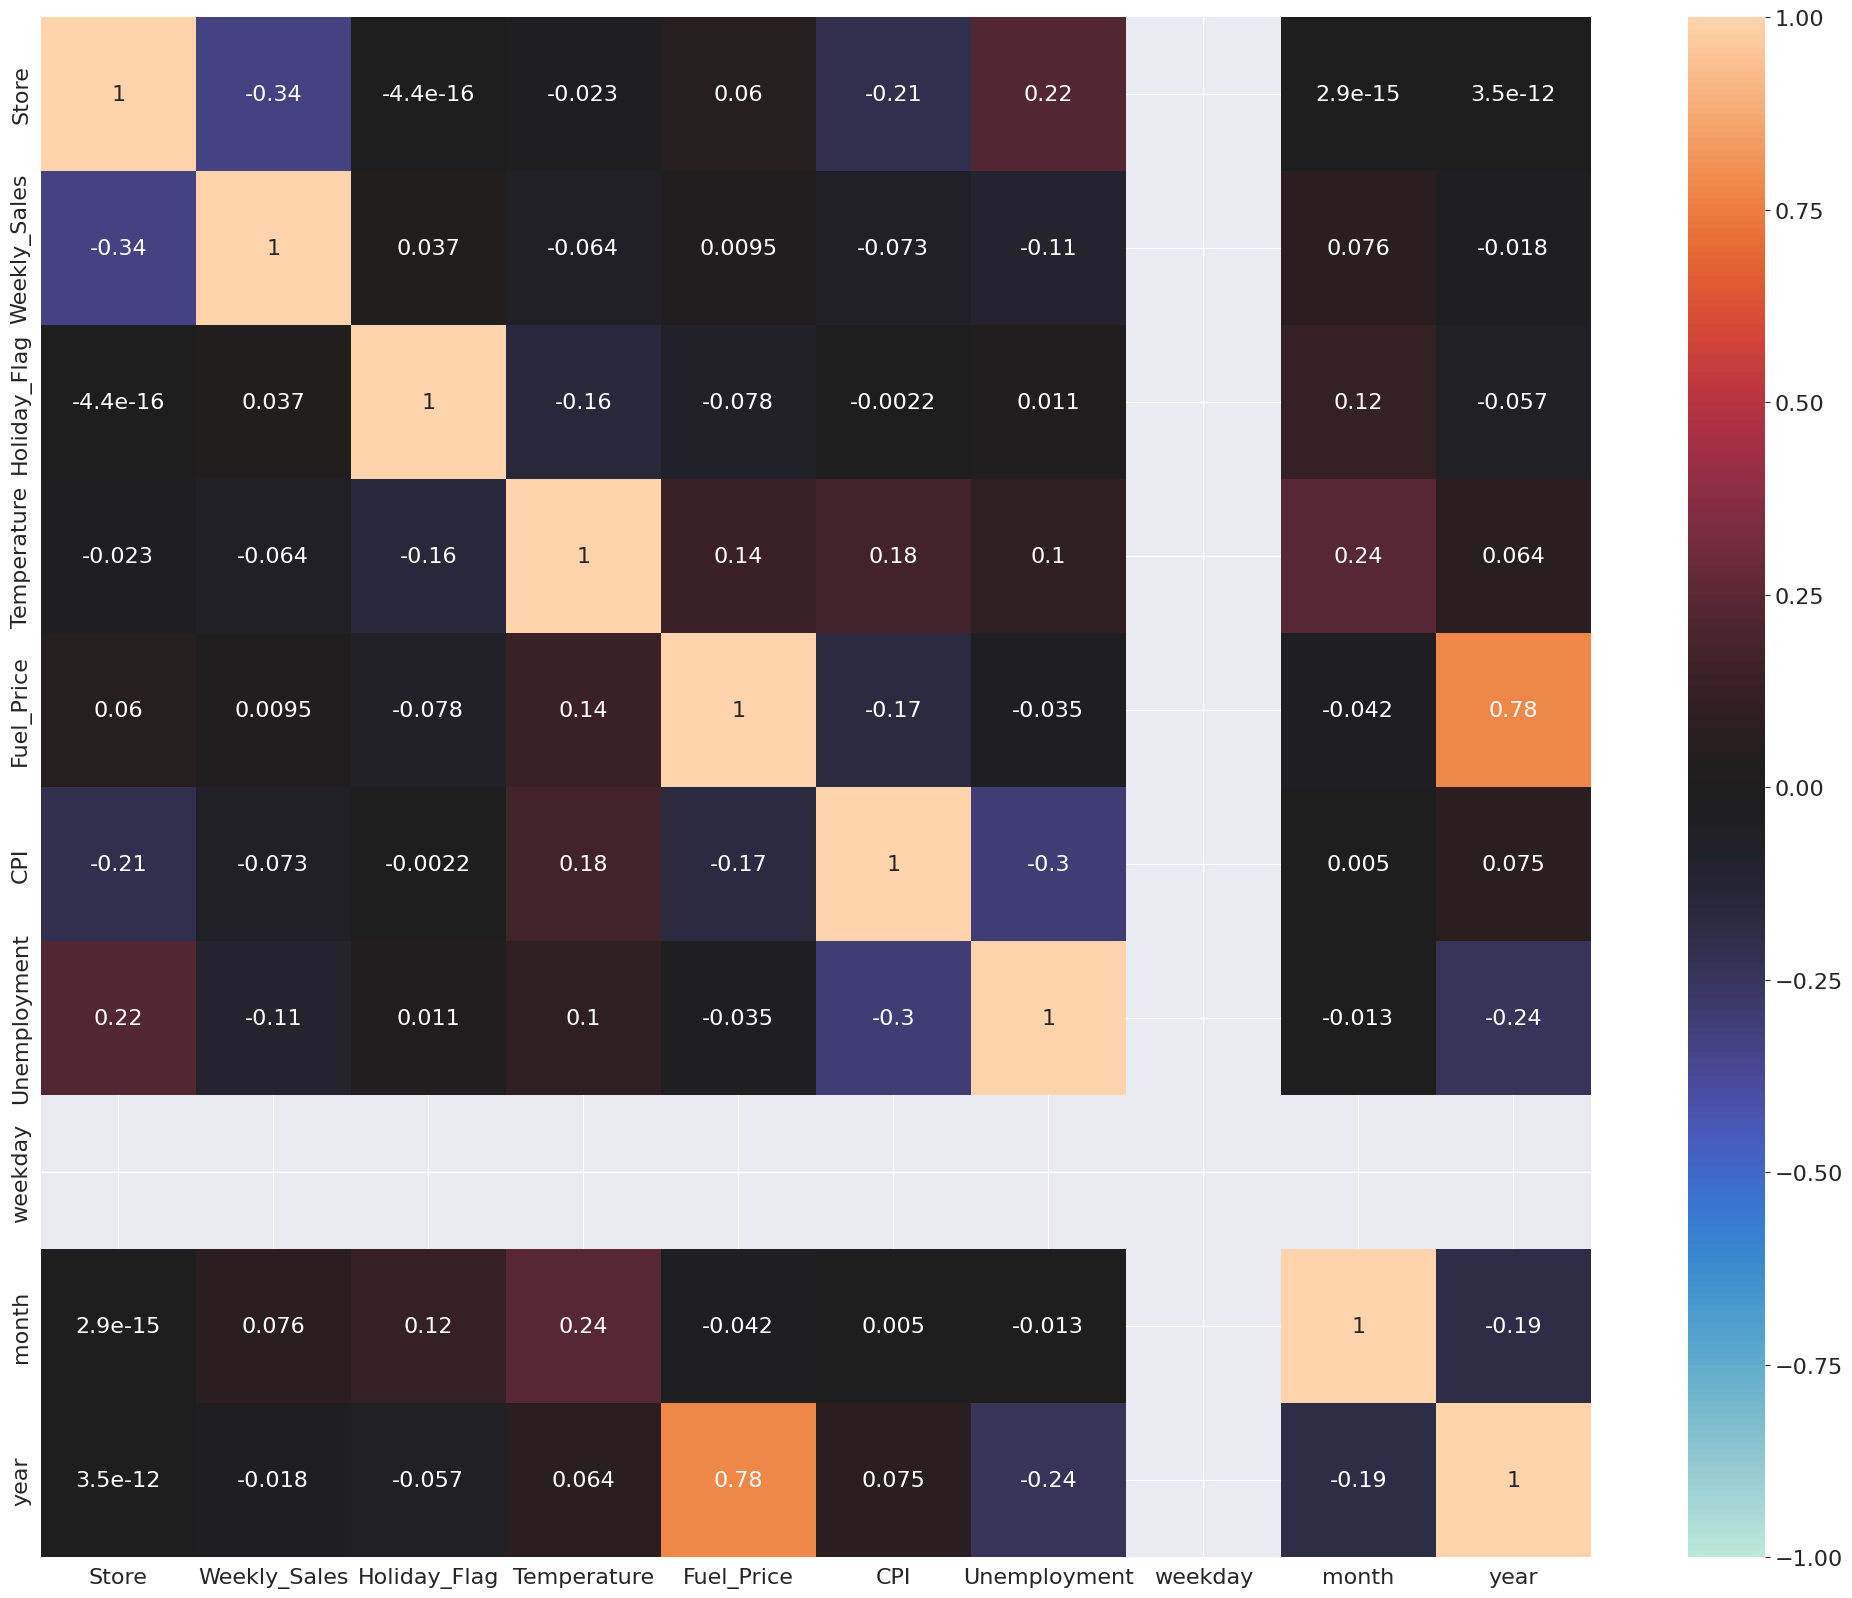

In [115]:

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

# **RFE**

Out of all the 78 features all are not important and we have to choose

the important feature out of all the features


usin RFE

In [116]:
from sklearn.linear_model import LinearRegression

Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=data.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=X_train.shape[1]-i)
    rfe = rfe.fit(X_train, y_train)
    LR = LinearRegression()
    LR.fit(X_train.loc[:,rfe.support_], y_train)
    pred1 = LR.predict(X_train.loc[:,rfe.support_])
    pred2 = LR.predict(X_test.loc[:,rfe.support_])
    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

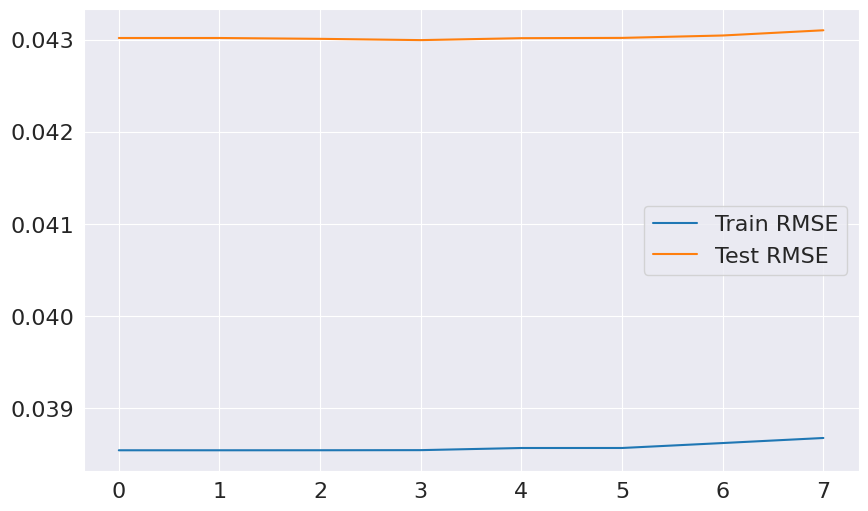

In [117]:
plt.plot(Trr, label= 'Train RMSE')
plt.plot(Tss, label= 'Test RMSE')
plt.legend()
plt.show()

In [118]:

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=X_train.shape[1]-9)
rfe = rfe.fit(X_train, y_train)
LR = LinearRegression()
LR.fit(X_train.loc[:,rfe.support_], y_train)
pred1 = LR.predict(X_train.loc[:,rfe.support_])
pred2 = LR.predict(X_test.loc[:,rfe.support_])
print("MSE train",np.sqrt(mean_squared_error(y_train, pred1)))
print("MSE test",np.sqrt(mean_squared_error(y_test, pred2)))
print("r2_score train - {}".format(r2_score(y_train, pred1)))
print("r2_score test - {}".format(r2_score(y_test, pred2)))

MSE train 0.038902035275263445
MSE test 0.04325112297647686
r2_score train - 0.9389186865616108
r2_score test - 0.929629683567451


**Now** Removing the 10 features and create the New training and test dataset

In [119]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]

Now onwards I am going to use various models


# <center> 6. Predictive Modelling

## Objective:


# REGRESSION LINEAR


> Ajouter une citation



In [122]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_train)
pred2 = lr.predict(X_test)

print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred2))))
print("r2_score train {}".format(r2_score(y_train, pred1)))
print("r2_score test {}".format(r2_score(y_test, pred2)))

Root Mean Squared Error train 0.0015133683485578412
Root Mean Squared Error test 0.04325112297647686
r2_score train 0.9389186865616108
r2_score test 0.929629683567451




--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9380889849901288
Residual Sum of Squares (RSS) on Training set  ---> 7.304552161864375
Mean Squared Error (MSE) on Training set       ---> 0.001533925275486009
Root Mean Squared Error (RMSE) on Training set ---> 0.03916535810491217

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.928441811042915
Residual Sum of Squares (RSS) on Training set  ---> 2.2655642040850843
Mean Squared Error (MSE) on Training set       ---> 0.001902236947174714
Root Mean Squared Error (RMSE) on Training set ---> 0.04361464143122942

--------------------Residual Plots--------------------


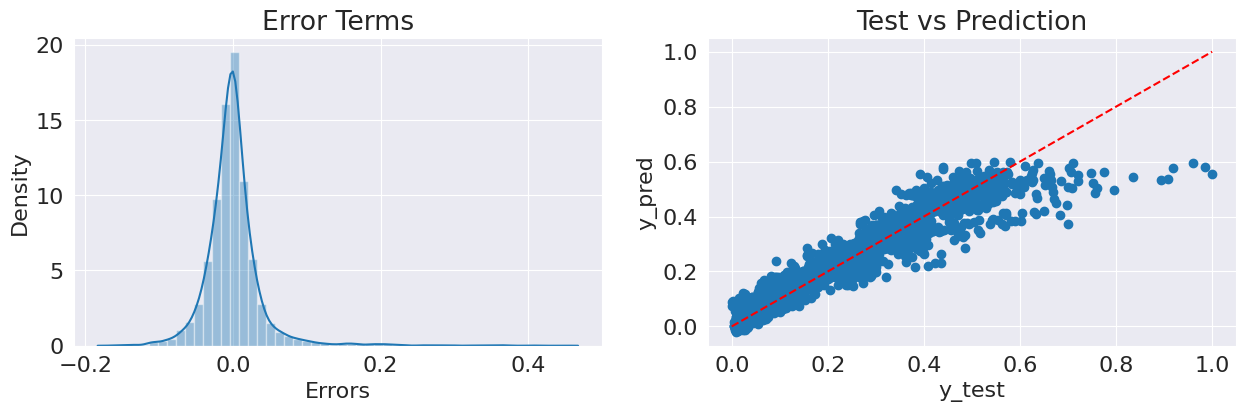

In [134]:
# Définition de la fonction Evaluate
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([1,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc = np.random.choice(X_train.loc[:, X_train.nunique() >= 50].columns.values, 2, replace=False)

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Training set --->', round(r2_score(y_train, pred1), 20))
print('Residual Sum of Squares (RSS) on Training set  --->', round(np.sum(np.square(y_train - pred1)), 20))
print('Mean Squared Error (MSE) on Training set       --->', round(mean_squared_error(y_train, pred1), 20))
print('Root Mean Squared Error (RMSE) on Training set --->', round(np.sqrt(mean_squared_error(y_train, pred1)), 20))

print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Testing set --->', round(r2_score(y_test, pred2), 20))
print('Residual Sum of Squares (RSS) on Training set  --->', round(np.sum(np.square(y_test - pred2)), 20))
print('Mean Squared Error (MSE) on Training set       --->', round(mean_squared_error(y_test, pred2), 20))
print('Root Mean Squared Error (RMSE) on Training set --->', round(np.sqrt(mean_squared_error(y_test, pred2)), 20))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15, 4])

plt.subplot(1, 2, 1)
sns.distplot((y_train - pred1))
plt.title('Error Terms')
plt.xlabel('Errors')

plt.subplot(1, 2, 2)
plt.scatter(y_train, pred1)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()




**RIDGE REGRESSION**

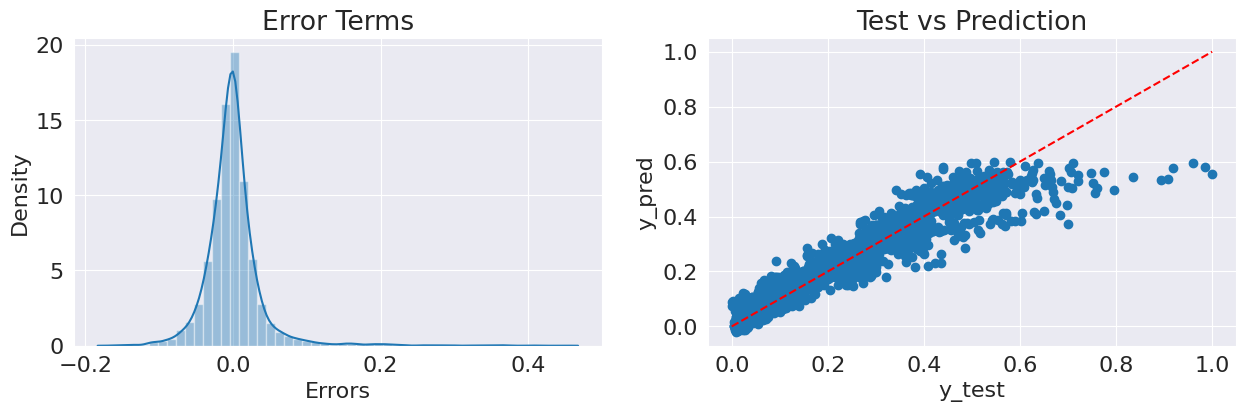

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  0.2852704505143167


In [136]:
#Creating a Ridge Regression model

RLR = Ridge().fit(X_train,y_train)
pred1 = RLR.predict(X_train)
pred2 = RLR.predict(X_test)
plt.figure(figsize=[15, 4])

plt.subplot(1, 2, 1)
sns.distplot((y_train - pred1))
plt.title('Error Terms')
plt.xlabel('Errors')

plt.subplot(1, 2, 2)
plt.scatter(y_train, pred1)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()
print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',lr.intercept_)


**LASSO REGRESSION **

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  0.2852704505143167


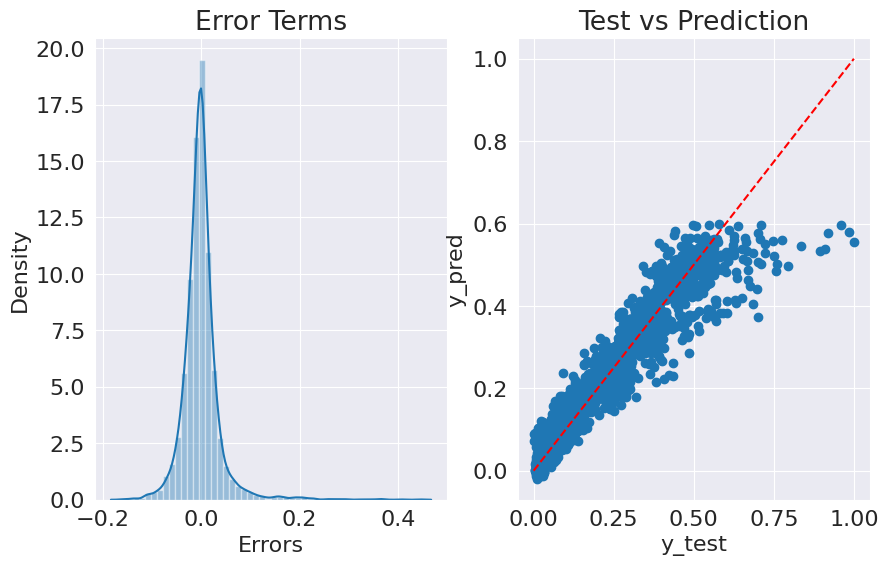

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  0.2852704505143167


In [137]:
from sklearn.linear_model import Lasso
lr1 = Lasso()
lr1.fit(X_train, y_train)
predlr1 = lr1.predict(X_train)
predlr2 = lr1.predict(X_test)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',lr.intercept_)

plt.subplot(1, 2, 1)
sns.distplot((y_train - pred1))
plt.title('Error Terms')
plt.xlabel('Errors')

plt.subplot(1, 2, 2)
plt.scatter(y_train, pred1)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()
print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',lr.intercept_)


**Polynomial Regression**

In [138]:
Trr = []
Tss = []
for i in range(2,4):
  poly_reg = PolynomialFeatures(degree = i)
  pl_X_train = poly_reg.fit_transform(X_train)
  pl_X_test = poly_reg.fit_transform(X_test)
  lr = LinearRegression()
  lr.fit(pl_X_train, y_train)
  pred_poly_train = lr.predict(pl_X_train)
  Trr.append(np.sqrt(mean_squared_error(y_train, pred_poly_train)))
  pred_poly_test = lr.predict(pl_X_test)
  Tss.append(np.sqrt(mean_squared_error(y_test, pred_poly_test)))

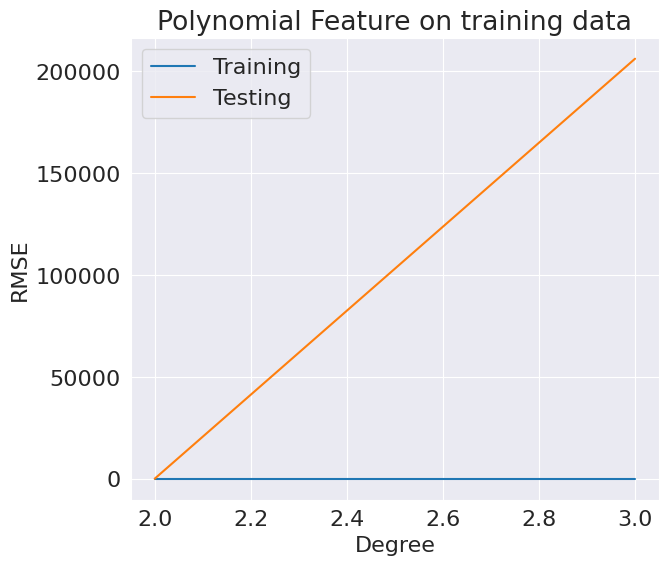

In [139]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,4), Trr, label= 'Training')
plt.plot(range(2,4), Tss, label= 'Testing')
plt.title('Polynomial Feature on training data')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

In [140]:
poly_reg = PolynomialFeatures(degree = 2)
pl_X_train = poly_reg.fit_transform(X_train)
pl_X_test = poly_reg.fit_transform(X_test)
lr = LinearRegression()
lr.fit(pl_X_train, y_train)
pred_poly_train = lr.predict(pl_X_train)
print("r2_score train {}".format(r2_score(pred_poly_train, y_train)))
pred_poly_test = lr.predict(pl_X_test)
print("r2_score test {}".format(r2_score(pred_poly_test, y_test)))
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred_poly_train))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred_poly_test))))

r2_score train 0.9549340538522609
r2_score test 0.9371797967825095
Root Mean Squared Error train 0.0010683654035495735
Root Mean Squared Error test 0.03911319889002968


In [141]:
tabel = {
        'Train R2': [0.9389186865616108, 0.9380889849901288, 0.9380889849901288  ,0.9549340538522609],
        'Test R2' : [0.929629683567451, 0.928441811042915, 0.928441811042915, 0.9371797967825095],
        'Train RMSE' : [0.038902035275263445, 0.03916535810491217, 0.03916535810491217, 0.0010683654035495735 ],
        'Test RMSE' : [0.04325112297647686, 0.04361464143122942, 0.04361464143122942,  0.03911319889002968 ]
        }

In [142]:
df_new = pd.DataFrame(tabel)

In [143]:
df_new.index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',  'Polynomial Regression']

In [144]:
df_new

,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.938919,0.929630,0.038902,0.043251
Ridge Regression,0.938089,0.928442,0.039165,0.043615
Lasso Regression,0.938089,0.928442,0.039165,0.043615
Polynomial Regression,0.954934,0.937180,0.001068,0.039113


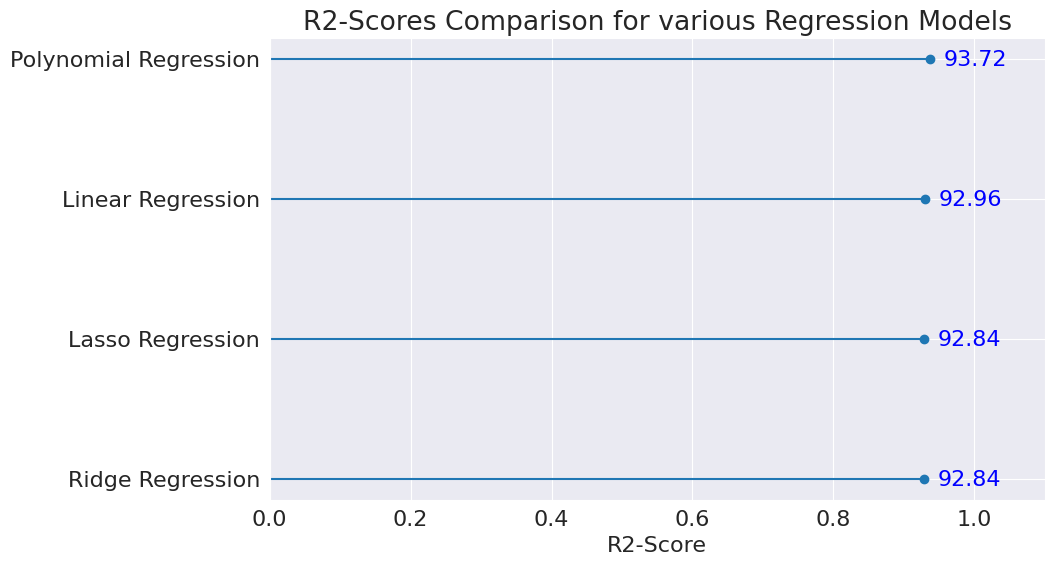

In [146]:
# R2-Scores Comparison for different Regression Models

R2 = round(df_new['Test R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

It is clear that plynomial Regression is the Best Model in the dataset, with test accuracy of 93%(approx).




R
2
  Score :valeur plus élevé indique un meilleur ajustement du modèle aux données.

